In [1]:
from EMDA import EMDA, __version__
print("EMDA version is:", __version__)

import matplotlib.pyplot as plt

plt.style.use('ggplot')

/Users/mikicanyelles/miniconda3/envs/emda-dev/lib/python3.12/site-packages/EMDA/emda.py:2: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm
/Users/mikicanyelles/miniconda3/envs/emda-dev/lib/python3.12/site-packages/Bio/Application/__init__.py:40: BiopythonDeprecationWarning: The Bio.Application modules and modules relying on it have been deprecated.

Due to the on going maintenance burden of keeping command line application
wrappers up to date, we have decided to deprecate and eventually remove these
modules.

We instead now recommend building your command line and invoking it directly
with the subprocess module.
  warnings.warn(


EMDA version is: 1.0.0a4


# Load parameters and trajectory <a class="anchor" id="load"></a>

In [2]:
parameters = 'parameters.prmtop' # AMBER parameters file
trajectory = 'trajectory.nc'     # AMBER NetCDF coordinates (10 frames)

In [3]:
emda = EMDA(parameters=parameters, trajectory=trajectory, fix_jump=True)

Trajectory has been loaded!


In [4]:
emda.load_variant(parameters, trajectory)

V2 variant has been loaded!


In [5]:
emda.load_trajectory(trajectory)
emda.load_trajectory(trajectory, variant_name='V1')
emda.load_trajectory(trajectory)

A new replica has been loaded to variant V2!
A new replica has been loaded to variant V1!
A new replica has been loaded to variant V2!


In [6]:
emda.universe

{'V1': {'R1': <Universe with 79250 atoms>, 'R2': <Universe with 79250 atoms>},
 'V2': {'R1': <Universe with 79250 atoms>,
  'R2': <Universe with 79250 atoms>,
  'R3': <Universe with 79250 atoms>}}

# Select the atoms to be used for the analysis <a class="anchor" id="select"></a>

In [7]:
emda.select('C10', 'C10', sel_type='at_name',)
emda.select('C11', 'C11', sel_type='at_name',)
emda.select('C12', 'C12', sel_type='at_name',)
emda.select('C13', 'C13', sel_type='at_name')
emda.select('C14', 'C14', sel_type='at_name',)
emda.select('H12', ['H12A', 'H12B'], sel_type='at_name')
emda.select('cof', 10597, sel_type='at_num')

emda.select('COO', [10599, 10600, 10601], sel_type='at_num')

#subs = emda.universe.select_atoms('resid 666')
emda.select('subs', 666, sel_type='res_num')

emda.select('helix', list(range(617,645)), sel_type='res_num')

print(emda.selections)

{'C10': 'name C10', 'C11': 'name C11', 'C12': 'name C12', 'C13': 'name C13', 'C14': 'name C14', 'H12': 'name H12A or name H12B', 'cof': 'bynum 10597', 'COO': 'bynum 10599 or bynum 10600 or bynum 10601', 'subs': 'resid 666', 'helix': 'resid 617 or resid 618 or resid 619 or resid 620 or resid 621 or resid 622 or resid 623 or resid 624 or resid 625 or resid 626 or resid 627 or resid 628 or resid 629 or resid 630 or resid 631 or resid 632 or resid 633 or resid 634 or resid 635 or resid 636 or resid 637 or resid 638 or resid 639 or resid 640 or resid 641 or resid 642 or resid 643 or resid 644'}


# Analysis of the trajectory <a class="anchor" id="trajanalysis"></a>

In [8]:
emda.add_distance('dist_H12', 'cof', 'H12')
emda.add_angle('angle_C11C12C13', 'C11', 'C12', 'C13')
emda.add_dihedral('dihe_C10C11C13C14', 'C10', 'C11', 'C13', 'C14', domain=180)
#emda.add_contacts('contacts_COO', 'COO', sel_env=5, interactions='all', include_WAT=False, measure_distances=True)
#emda.add_per_residue_contacts('contacts_prot', sel_env=3, measure_distances=True)
#emda.add_per_residue_contacts('helix_contacts_sel', 'helix', sel_env=5, measure_distances=True, within_selection=True)

#emda.add_pKa('pka', excluded_ions=['Na+'], keep_pdb=True, keep_pka=True)
#emda.add_RMSD('RMSD_subs', 'subs', weights='mass')

## Run the measurements

In [9]:
emda.run()

Variants:   0%|          | 0/2 [00:00<?, ?var/s]

Measuring variant V1, replica R1:   0%|          | 0/10 [00:00<?, ?Frame/s]

Measuring variant V1, replica R2:   0%|          | 0/10 [00:00<?, ?Frame/s]

Measuring variant V2, replica R1:   0%|          | 0/10 [00:00<?, ?Frame/s]

Measuring variant V2, replica R2:   0%|          | 0/10 [00:00<?, ?Frame/s]

Measuring variant V2, replica R3:   0%|          | 0/10 [00:00<?, ?Frame/s]

emda.measures['dist_H12'].result

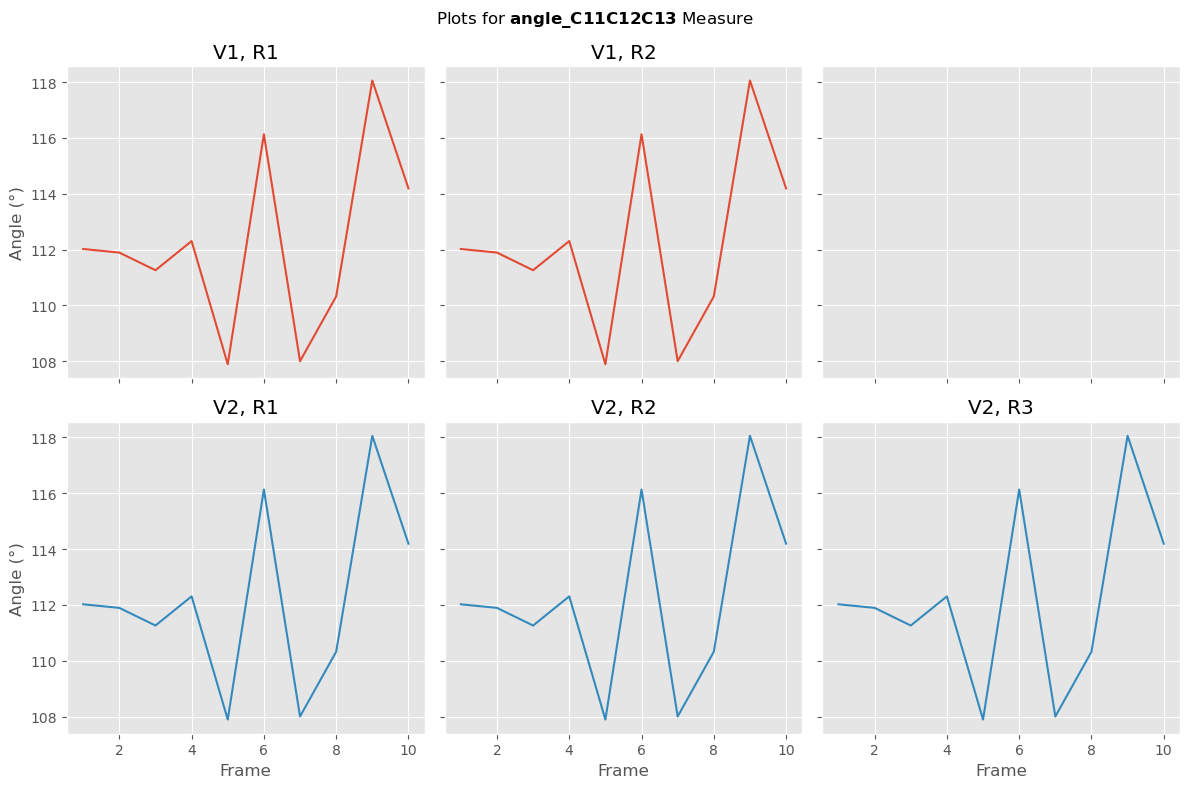

In [10]:
emda.plot_measure(measure_name='angle_C11C12C13', combine_replicas=False, width_per_replica=4)

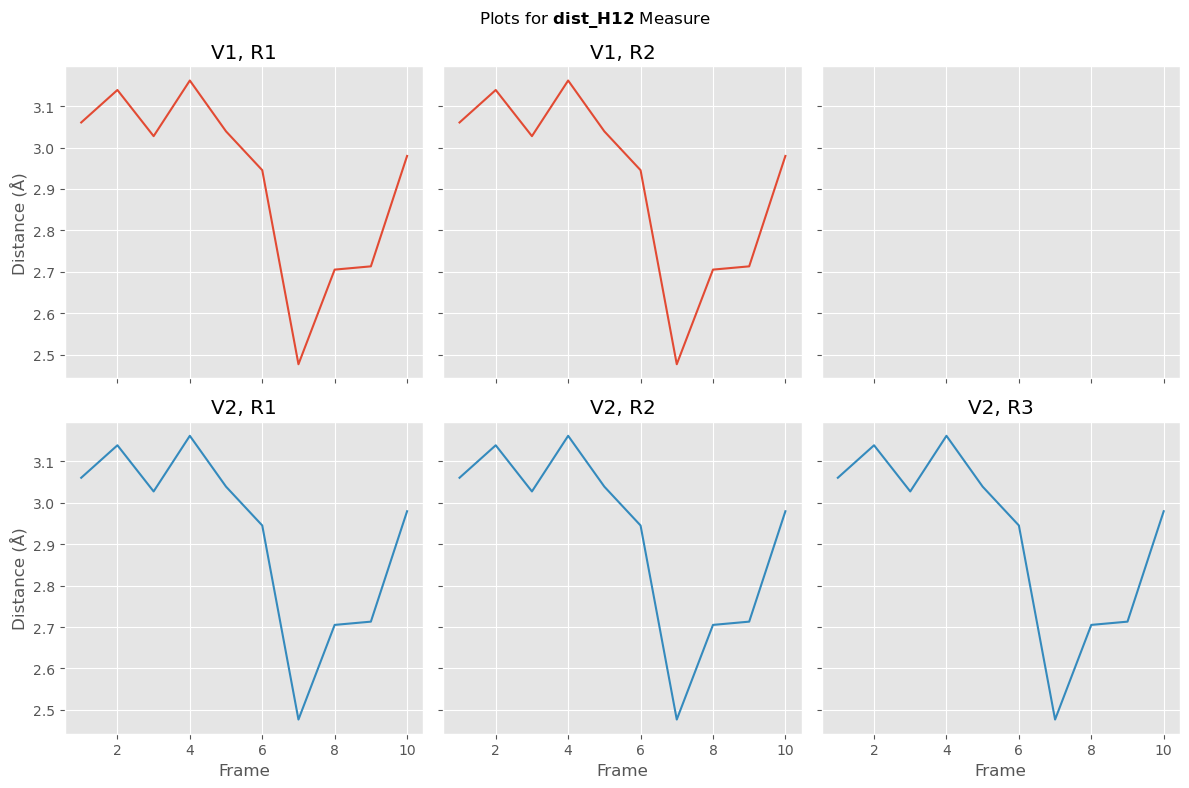

In [11]:
emda.plot_measure(measure_name='dist_H12', combine_replicas=False, width_per_replica=4)

## Analyse distances, angles and dihedrals

In [12]:
emda.analyse_value('dist_H12_bool', 'dist_H12', 5)
emda.analyse_value('dihe_C10C11C13C14_bool', 'dihe_C10C11C13C14', 0, 20, mode='tol')

In [13]:
emda.analyse_NACs('dist_dihe_NACs', ['dist_H12_bool', 'dihe_C10C11C13C14_bool'], invert=False)


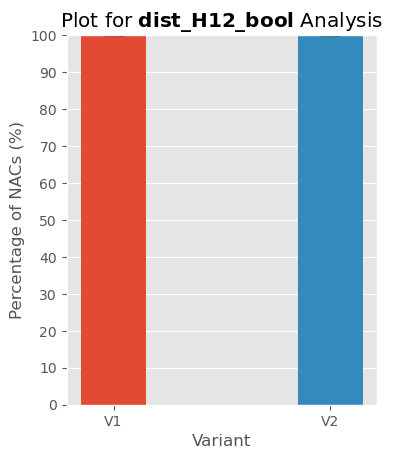

In [14]:
emda.plot_NACs('dist_H12_bool', merge_replicas=True, percentage=True, bar_width=0.1, width=4)

In [15]:
?emda.add_RMSD

Signature:
emda.add_RMSD(
    name,
    sel,
    ref=0,
    center: bool = True,
    superposition: bool = True,
    weights=None,
)
Docstring:
DESCRIPTION:
    This function outputs the RMSD of a selection

USAGE:
    EMDA.add_RMSD(name, sel, ref=int, center=[ True | False ], superposition=[ True | False ], weights=[ None | "mass" ])

INPUT:
    - name:     name of the measurement
    - sel:      selection as EMDA.selection key
    - ref:      reference universe. If not provided, the first frame will be used as the reference.
    - center:   substracts the COM of the selection
    - superposition [bool]: rotates and translates the frame to align the reference. Its activation forces center to be True by MDAnalysis' implementation

OUTPUT:
    - Array of RMSDs of each frame against a reference
File:      ~/miniconda3/envs/emda-dev/lib/python3.12/site-packages/EMDA/adders.py
Type:      method

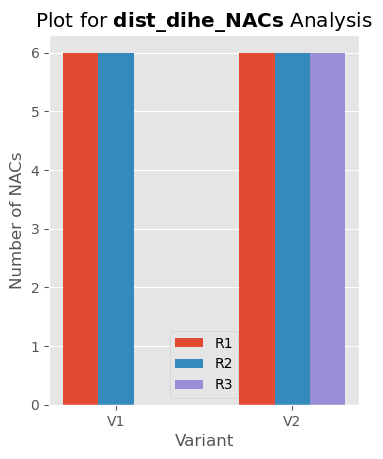

In [16]:
emda.plot_NACs('dist_dihe_NACs', merge_replicas=False, percentage=False, bar_width=0.2)

In [17]:
emda.analyse_probability_density('pdf_test', ['dist_H12', 'angle_C11C12C13'], num_of_points=10, get_basins=True)

In [18]:
emda.analyses['pdf_test']

Analysis dataclass with:
	Name:   pdf_test
	Type:   pdf
	Related mesure:    ['dist_H12', 'angle_C11C12C13']

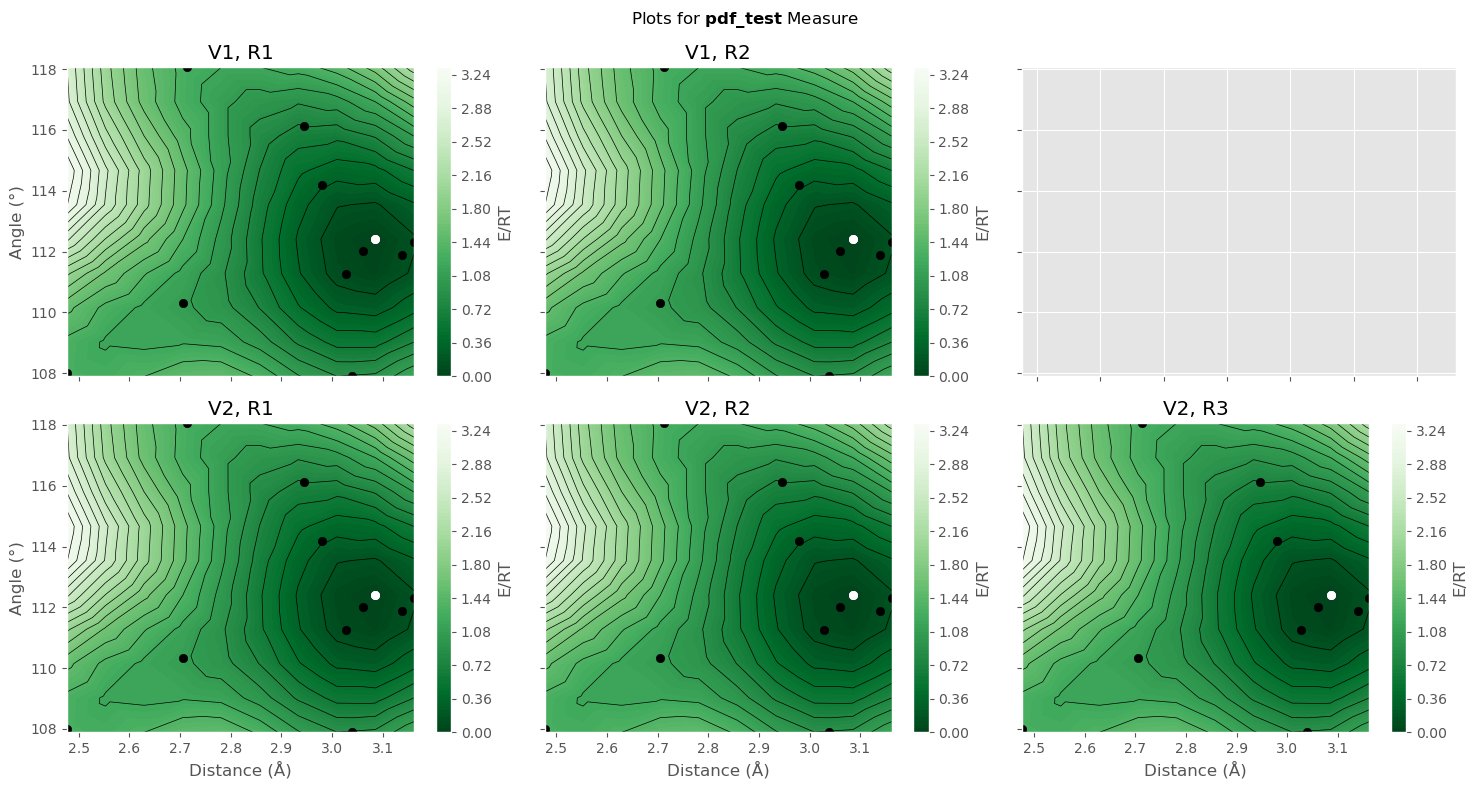

In [19]:
emda.plot_probability_densities('pdf_test', width_per_replica=5, color_map='Greens_r', show_contour_lines=True, levels_fill=100)

## Analyse contacts

In [20]:
emda.analyse_contacts_frequency('contacts_COO_freq', 'contacts_COO', percentage=True)

KeyError: 'contacts_COO'

In [ ]:
emda.analyses['contacts_COO_freq'].result

KeyError: 'contacts_COO_freq'

In [ ]:
# plotting from plotter
emda.plot_contacts_frequency('contacts_COO_freq', width_per_replica=6, same_x=False, same_y=False, merge_replicas=False, bar_width=0.8)

/Users/mikicanyelles/miniconda3/envs/emda-dev/lib/python3.12/site-packages/EMDA/plotters.py:146: SyntaxWarning: invalid escape sequence '\_'
  fig.suptitle("Plots for " + r"$\bf{%s}$" % self.name.replace('_', '\_') +  " Measure")
/Users/mikicanyelles/miniconda3/envs/emda-dev/lib/python3.12/site-packages/EMDA/plotters.py:149: SyntaxWarning: invalid escape sequence '\_'
  fig.suptitle("Plots for " + r"$\bf{%s}$" % measure_name.replace('_', '\_') +  " Measure")
/Users/mikicanyelles/miniconda3/envs/emda-dev/lib/python3.12/site-packages/EMDA/plotters.py:263: SyntaxWarning: invalid escape sequence '\_'
  ax.set_title('Plot for ' + r"$\bf{%s}$" % analysis_obj.name.replace('_', '\_') + " Analysis")
/Users/mikicanyelles/miniconda3/envs/emda-dev/lib/python3.12/site-packages/EMDA/plotters.py:482: SyntaxWarning: invalid escape sequence '\_'
  fig.suptitle("Plots for " + r"$\bf{%s}$" % self.name.replace('_', '\_') +  " Measure")
/Users/mikicanyelles/miniconda3/envs/emda-dev/lib/python3.12/site-pack

KeyError: 'contacts_COO_freq'

In [ ]:
# plotting from Analysis' plot method
emda.analyses['contacts_COO_freq'].plot()

KeyError: 'contacts_COO_freq'

In [ ]:
emda.analyse_contacts_amount('contacts_COO_amount', 'contacts_COO')

In [ ]:
emda.analyses['contacts_COO_amount'].options

{'mode': 'contacts'}

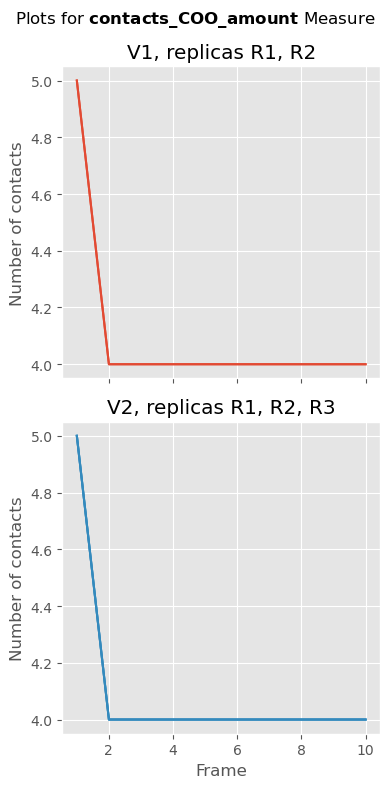

In [ ]:
emda.analyses['contacts_COO_amount'].plot(merge_replicas=True)

In [ ]:
# The Analysis' plot method nor the plot_measure plotter are compatible yet
emda.analyses['contacts_prot_amount'].plot

KeyError: 'contacts_prot_amount'

In [ ]:
print(emda.measures['contacts_COO'].result)

{'V1': {'R1': [{'PHE174': 4.07980881465334, 'LEU178': 3.5435824880000375, 'ARG402': 1.9399333834911683, 'GLN406': 2.867864767800535, 'LEU407': 4.24181764223233}, {'PHE174': 4.4558988619008435, 'LEU178': 3.8466559600196835, 'ARG402': 1.8721366515157698, 'GLN406': 2.836182864593443}, {'PHE174': 3.6862194916378637, 'LEU178': 3.7155243912469964, 'ARG402': 1.9201518479778008, 'GLN406': 2.5640726493302677}, {'PHE174': 3.3549618547451088, 'LEU178': 4.178788656048772, 'ARG402': 1.751238839056139, 'GLN406': 2.9398608975847096}, {'PHE174': 4.025384584892292, 'LEU178': 4.63404880443787, 'ARG402': 1.8513355559435591, 'GLN406': 3.0151037695042144}, {'PHE174': 3.432455444286102, 'LEU178': 3.9452616933467906, 'ARG402': 2.0385103291148017, 'GLN406': 4.03837910384994}, {'PHE174': 4.492118366836145, 'LEU178': 4.012912198938719, 'ARG402': 1.7890444560801069, 'GLN406': 3.6012818873709262}, {'PHE174': 3.7858386697941766, 'LEU178': 4.204576690912167, 'ARG402': 1.8285848491558256, 'GLN406': 2.793990288621811

In [ ]:
emda.analyse_contacts_presence('contacts_presence', 'contacts_COO', ['402', '407'], mode='all')

In [ ]:
emda.analyses['contacts_presence'].result

{'V1': {'R1': [True,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False],
  'R2': [True, False, False, False, False, False, False, False, False, False]},
 'V2': {'R1': [True,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False],
  'R2': [True, False, False, False, False, False, False, False, False, False],
  'R3': [True, False, False, False, False, False, False, False, False, False]}}

In [ ]:
emda.analyse_contacts_frequency('prot_contacts_freq', 'contacts_prot')

In [ ]:
emda.analyse_contacts_frequency('helix_contacts_sel_freq', 'helix_contacts_sel')

In [ ]:
emda.analyses['helix_contacts_sel_freq'].result

{'V1': {'R1': {'GLY617': {'LYS619': 10,
    'PRO618': 10,
    'PRO620': 10,
    'LYS621': 10,
    'ALA622': 10},
   'PRO618': {'LYS619': 10,
    'VAL623': 10,
    'PRO620': 10,
    'LYS621': 10,
    'ALA622': 10},
   'LYS619': {'VAL623': 10,
    'PRO620': 10,
    'LYS621': 10,
    'LEU624': 10,
    'GLY617': 10,
    'ALA622': 10},
   'PRO620': {'PRO618': 10,
    'VAL623': 10,
    'ASN625': 10,
    'LYS621': 10,
    'LEU624': 10,
    'GLY617': 10,
    'ALA622': 10},
   'LYS621': {'LYS619': 10,
    'PRO618': 10,
    'GLN626': 10,
    'VAL623': 10,
    'ASN625': 10,
    'LEU624': 10,
    'GLY617': 10,
    'ALA622': 10},
   'ALA622': {'LYS619': 10,
    'PRO618': 10,
    'GLN626': 10,
    'VAL623': 10,
    'ASN625': 10,
    'PRO620': 10,
    'PHE627': 10,
    'LEU624': 10,
    'GLY617': 10},
   'VAL623': {'LYS619': 10,
    'PRO618': 10,
    'GLN626': 10,
    'ARG628': 10,
    'ASN625': 10,
    'PRO620': 10,
    'PHE627': 10,
    'LYS621': 10,
    'LEU624': 10},
   'LEU624': {'LYS619': 10,
 

In [ ]:
for residue in list(emda.analyses['helix_contacts_sel_freq'].result['V1']['R1'].keys()):
    for residue_ in list(emda.analyses['helix_contacts_sel_freq'].result['V1']['R1'][residue].keys()):
        if int(residue_[3:]) not in list(range(617, 645)):
            print(residue_)


In [ ]:
emda.analyse_probability_density('pdf_test', ['dist_H12', 'angle_C11C12C13'], num_of_points=10, get_basins=True)

In [ ]:
emda.analyses['pdf_test']

Analysis dataclass with:
	Name:   pdf_test
	Type:   pdf
	Related mesure:    ['dist_H12', 'angle_C11C12C13']

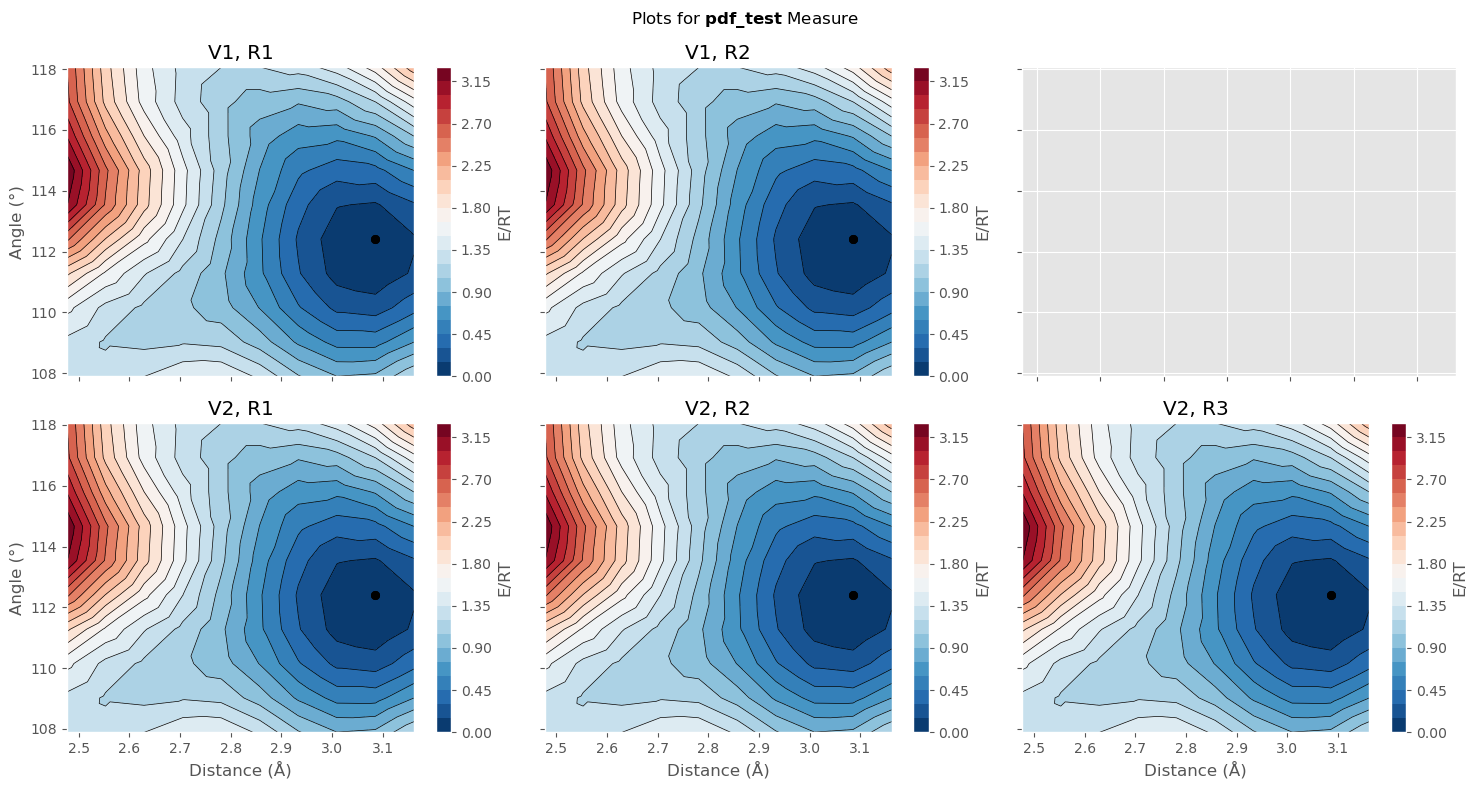

In [ ]:
emda.plot_probability_densities('pdf_test', width_per_replica=5)

In [ ]:
emda.analyses['dist_dihe_NACs'].result

{'V1': {'R1': [True,
   True,
   True,
   True,
   True,
   True,
   False,
   False,
   False,
   False]}}

In [ ]:
?emda.export_frames_by_analysis

Signature:
emda.export_frames_by_analysis(
    variant,
    replica,
    analysis_name,
    out_name=None,
    format='pdb',
    folder=None,
    selection='all',
)
Docstring:
DESCRIPTION:
    Function for exporting trajectories. Useful for exporting trajectories with transformations applied (such as wrap, unwrap or no jump).

ARGUMENTS:
    - variant :     variant name to export
    - replica :     replica to export
    - out_name:     name for the output file. Use * in the out_name to specify the position of the frame. If not present, it will be located before the extension.
    - format:       only pdb is available
    - folder:       subfolder where exported frames are saved

TODO:
    - [ ] Add more formats
File:      ~/miniconda3/envs/emda-dev/lib/python3.12/site-packages/EMDA/exporters.py
Type:      method

In [ ]:
emda.export_frames_by_analysis('V1', 'R1', analysis_name='dist_dihe_NACs', out_name='md_test_frame_*.pdb', selection='protein', folder='test')